# Analysis

In [3]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [4]:
# set up plotting settings for dark mode.
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
from src.plot_utils import ps_defaults
ps_defaults(use_tex=False, dpi=150)

In [5]:
import xarray as xr
import matplotlib.pyplot as plt

In [6]:
from src.models.model_setup import ModelSetup
from src.xr_utils import open_dataset, open_dataarray
from src.configs.load_config import load_config

In [7]:
import os

In [16]:
run_dir = "/home/users/sithom/seager19/logs/cd_2.7/wandb/run-20210616_230128-1vre85tn/files"

In [17]:
cfg = load_config(test=False)
setup = ModelSetup(run_dir, cfg,  make_move=False)

In [18]:
from src.plot_utils import label_subplots, cmap, add_units, get_dim

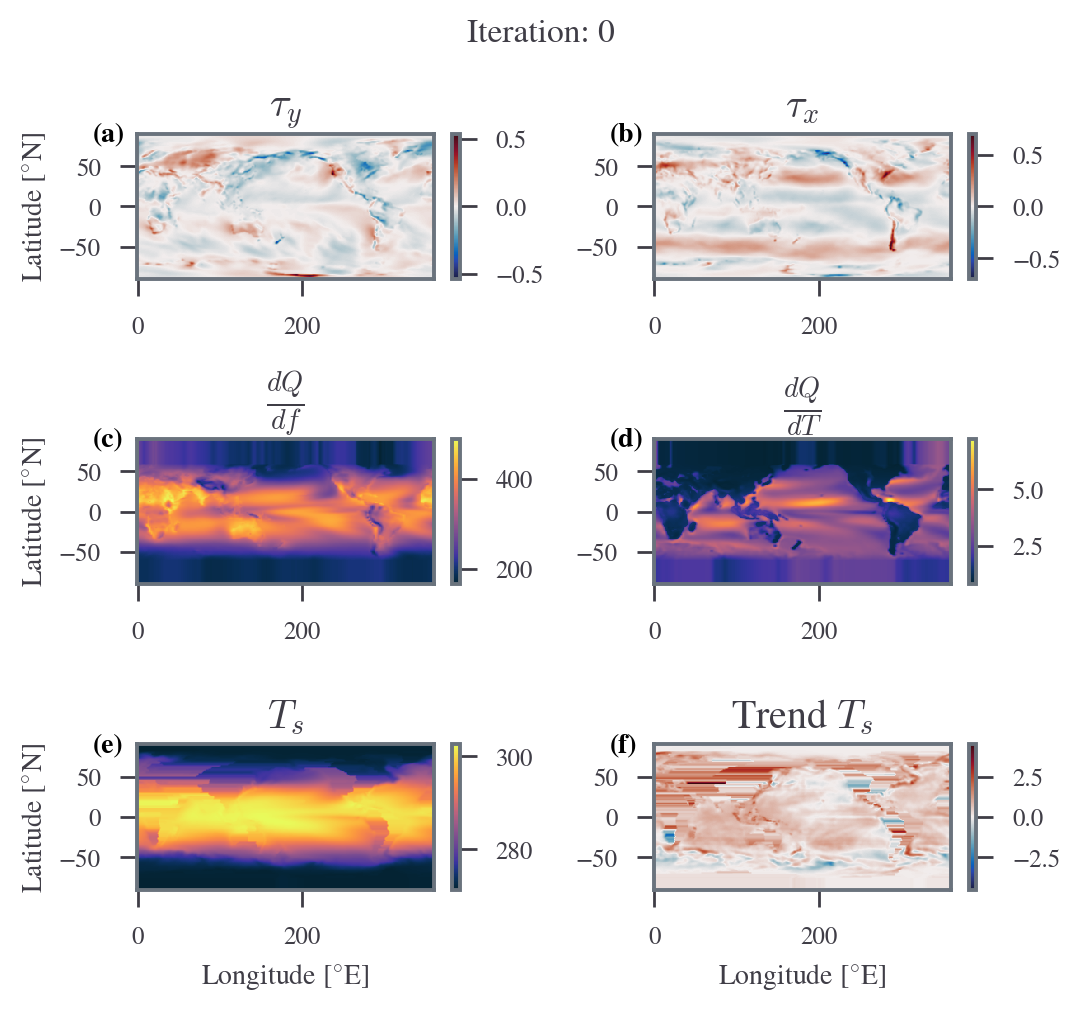

In [53]:
it=0
fig, axs = plt.subplots(3,2, figsize=get_dim(ratio=(5 ** 0.5 - 1) / 2 * 1.5))
plt.suptitle("Iteration: " + str(0))
add_units(open_dataarray(setup.tau_y(it=it)).isel(T=1)).plot(ax=axs[0, 0], cmap=cmap('delta'))
axs[0, 0].set_title(r"$\tau_y$")
axs[0, 0].set_xlabel("")
add_units(open_dataarray(setup.tau_x(it=it)).isel(T=1)).plot(ax=axs[0, 1], cmap=cmap('delta'))
axs[0, 1].set_title(r"$\tau_x$")
axs[0, 1].set_xlabel("")
axs[0, 1].set_ylabel("")
add_units(open_dataarray(setup.dq_df(it=it)).isel(T=1)).plot(ax=axs[1, 0], cmap=cmap('sst'))
axs[1, 0].set_title(r"$\frac{dQ}{df}$")
axs[1, 0].set_xlabel("")
add_units(open_dataarray(setup.dq_dt(it=it)).isel(T=1)).plot(ax=axs[1, 1], cmap=cmap('sst'))
axs[1, 1].set_title(r"$\frac{dQ}{dT}$")
axs[1, 1].set_xlabel("")
axs[1, 1].set_ylabel("")
add_units(open_dataarray(setup.ts_clim(it=it))).plot(ax=axs[2, 0], cmap=cmap('sst'))
axs[2, 0].set_title(r"$T_s$")
add_units(open_dataarray(setup.ts_trend(it=it))).plot(ax=axs[2, 1], cmap=cmap('delta'))
axs[2, 1].set_title(r"Trend $T_s$")
axs[2, 1].set_ylabel("")
plt.tight_layout()
label_subplots(axs, y_pos=1.08, x_pos=-0.15)
plt.show()

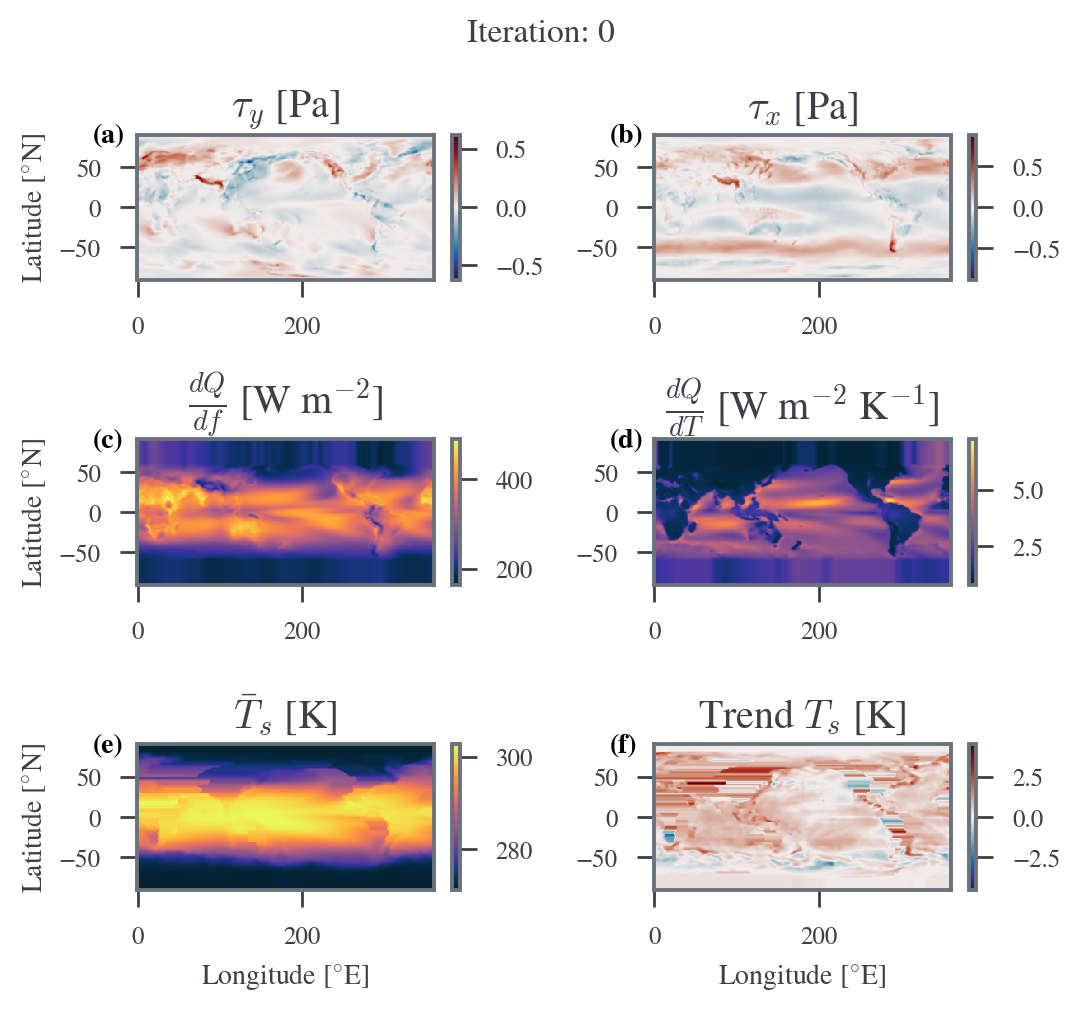

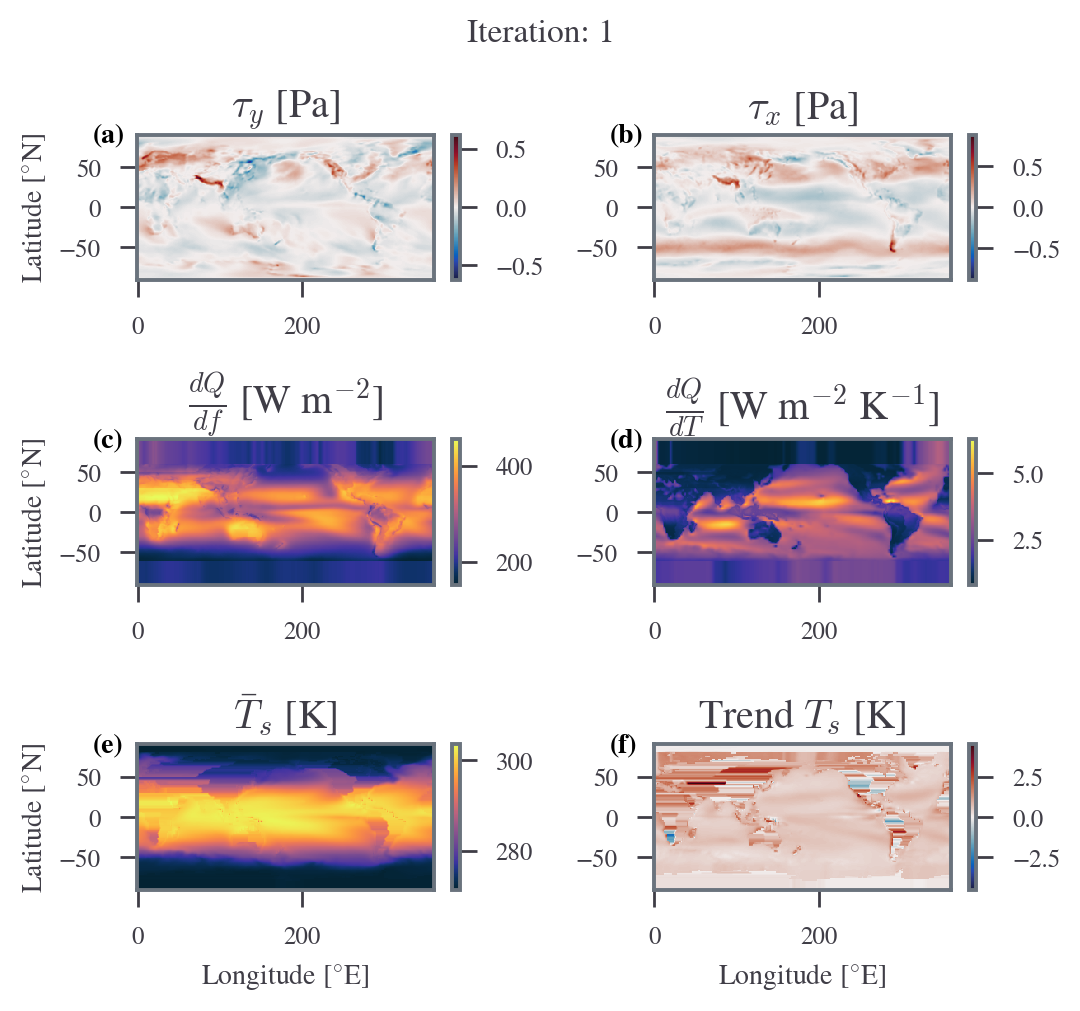

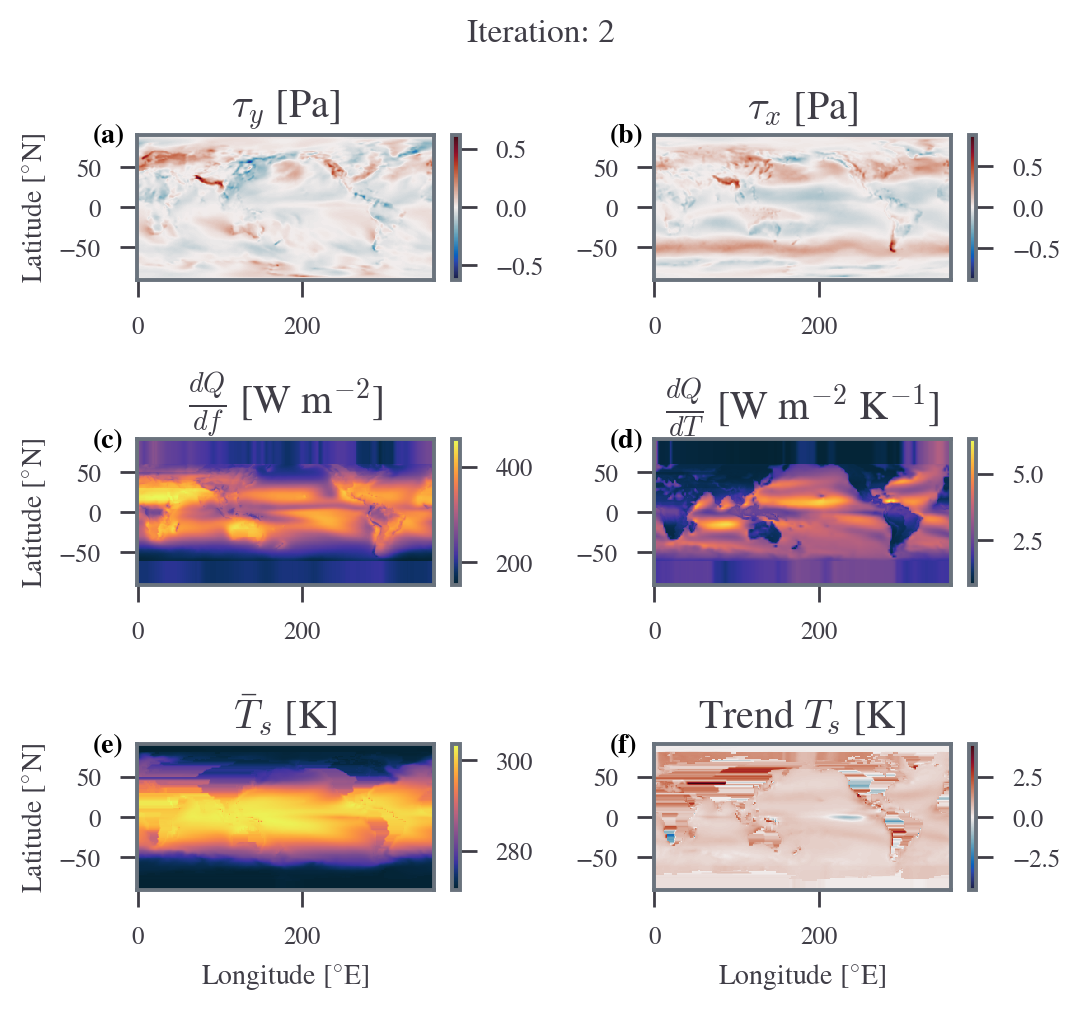

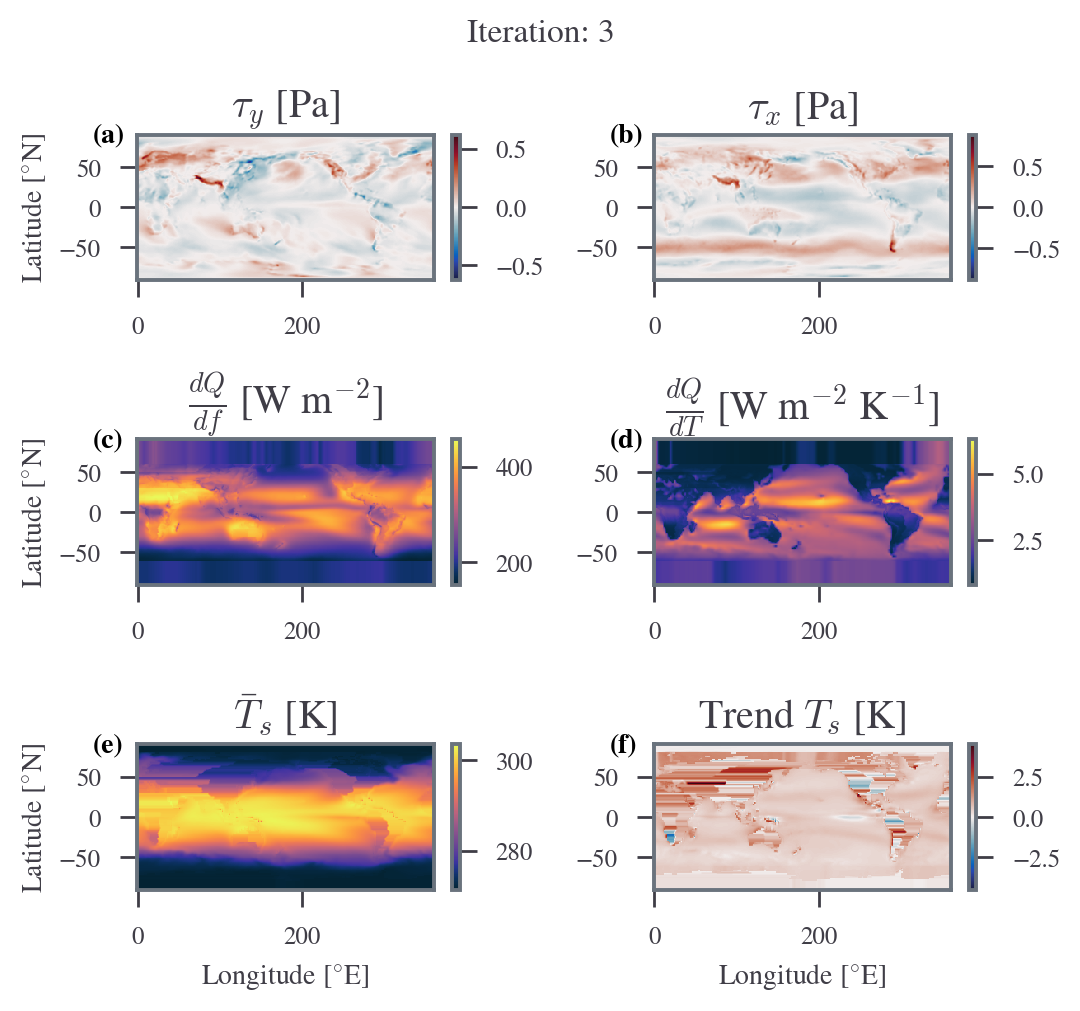

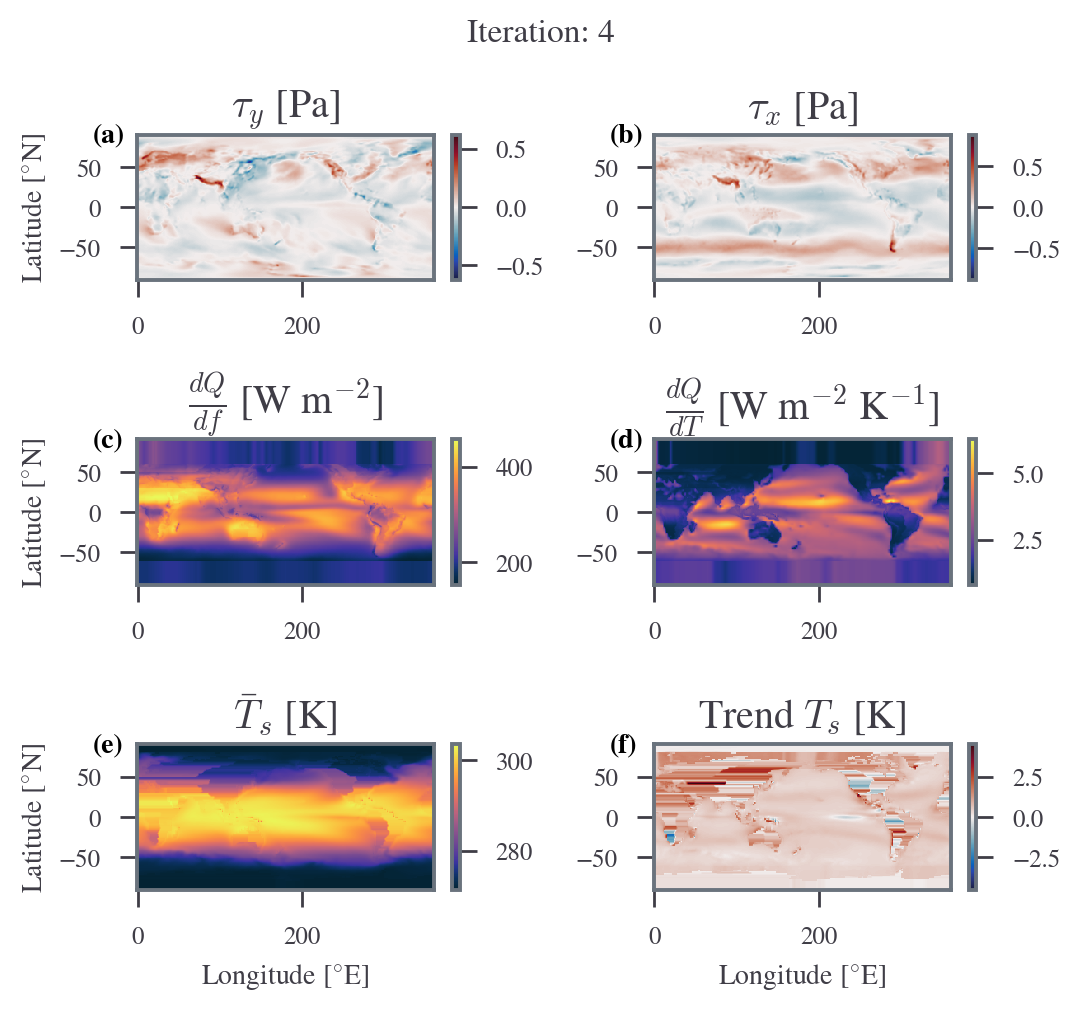

In [52]:
for it in range(setup.cfg.coup.iterations):
    fig, axs = plt.subplots(3,2, figsize=get_dim(ratio=(5 ** 0.5 - 1) / 2 * 1.5))
    plt.suptitle("Iteration: " + str(it))
    add_units(open_dataarray(setup.tau_y(it=it)).isel(T=600)).plot(ax=axs[0, 0], cmap=cmap('delta'))
    axs[0, 0].set_title(r"$\tau_y$ [Pa]")
    axs[0, 0].set_xlabel("")
    add_units(open_dataarray(setup.tau_x(it=it)).isel(T=600)).plot(ax=axs[0, 1], cmap=cmap('delta'))
    axs[0, 1].set_title(r"$\tau_x$ [Pa]")
    axs[0, 1].set_xlabel("")
    axs[0, 1].set_ylabel("")
    add_units(open_dataarray(setup.dq_df(it=it)).isel(T=1)).plot(ax=axs[1, 0], cmap=cmap('sst'))
    axs[1, 0].set_title(r"$\frac{dQ}{df}$ [W m$^{-2}$]")
    axs[1, 0].set_xlabel("")
    add_units(open_dataarray(setup.dq_dt(it=it)).isel(T=1)).plot(ax=axs[1, 1], cmap=cmap('sst'))
    axs[1, 1].set_title(r"$\frac{dQ}{dT}$ [W m$^{-2}$ K$^{-1}$]")
    axs[1, 1].set_xlabel("")
    axs[1, 1].set_ylabel("")
    add_units(open_dataarray(setup.ts_clim(it=it))).plot(ax=axs[2, 0], cmap=cmap('sst'))
    axs[2, 0].set_title(r"$\bar{T}_s$ [K]")
    add_units(open_dataarray(setup.ts_trend(it=it))).plot(ax=axs[2, 1], cmap=cmap('delta'))
    axs[2, 1].set_title(r"Trend $T_s$ [K]")
    axs[2, 1].set_ylabel("")
    plt.tight_layout()
    label_subplots(axs, y_pos=1.08, x_pos=-0.15)
    plt.show()

In [8]:
run_dir

'/home/users/sithom/seager19/logs/fix_ts_trend/wandb/run-20210616_083832-3athbzpm/files'

In [54]:
from src.visualisation.ani import animate_coupling

In [55]:
animate_coupling(setup)

/home/users/sithom/seager19/logs/cd_2.7/wandb/run-20210616_230128-1vre85tn/files/gifs/coupling.gif: 100%|██████████| 5/5 [00:18<00:00,  3.65s/it]


Video /home/users/sithom/seager19/logs/cd_2.7/wandb/run-20210616_230128-1vre85tn/files/gifs/coupling.gif made.
'animate_coupling'  19.10645 s 



In [56]:
import shutil

In [57]:
shutil.copy("/home/users/sithom/seager19/logs/cd_2.7/wandb/run-20210616_230128-1vre85tn/files/gifs/coupling.gif", "gifs/coupling.gif")

'gifs/coupling.gif'

![]

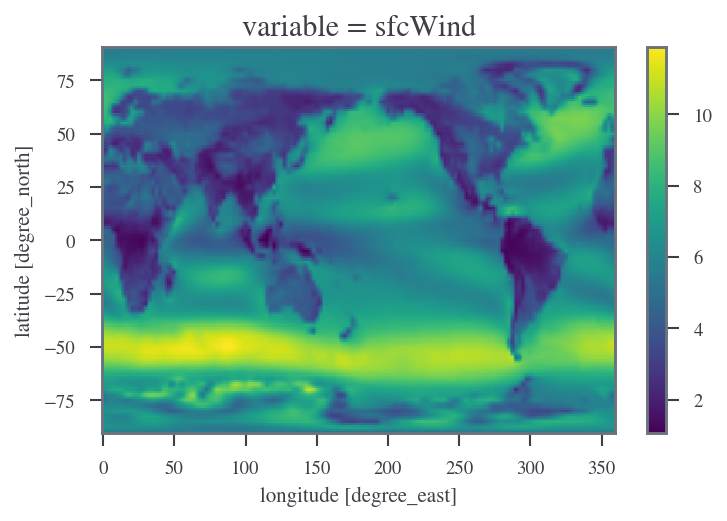

In [9]:
open_dataarray(setup.ecmwf_sfcwind()).plot()

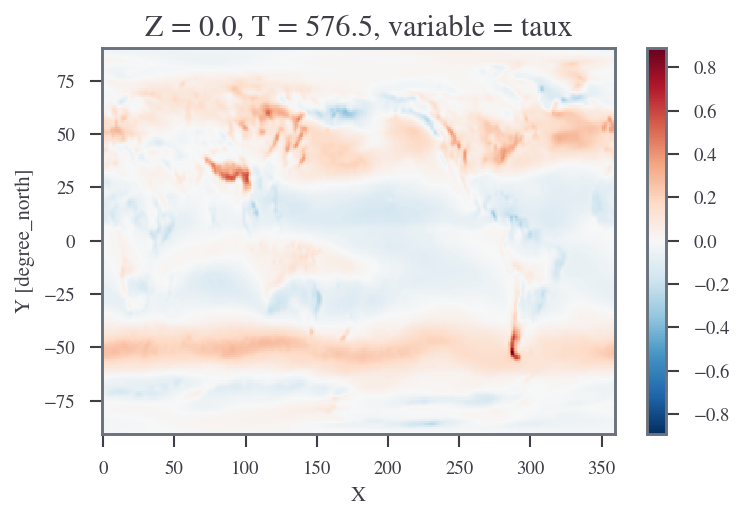

In [10]:
open_dataarray(setup.tau_x(it=1)).isel(T=600).plot()

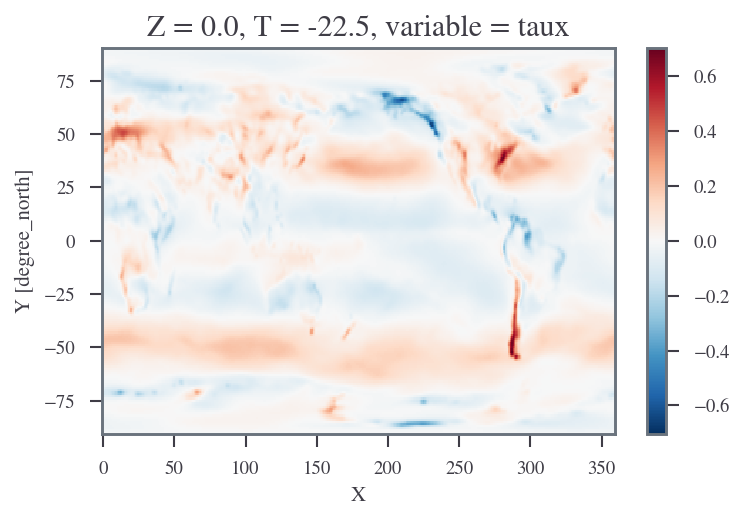

In [11]:
open_dataarray(setup.tau_x(it=1)).isel(T=1).plot()

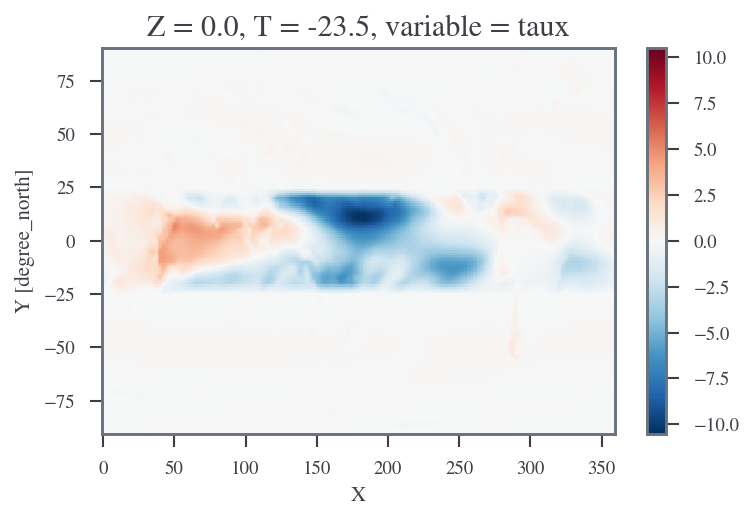

In [27]:
open_dataarray(setup.tau_x(it=1)).isel(T=0).plot()

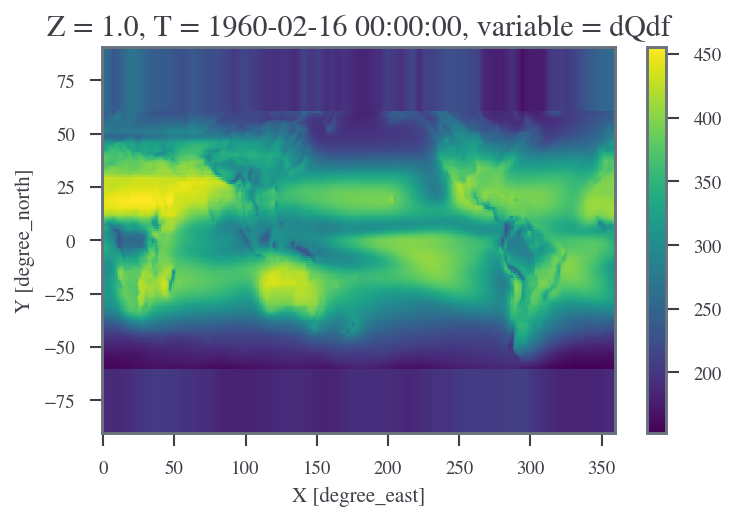

In [12]:
open_dataarray(setup.dq_df(it=1)).isel(T=1).plot()

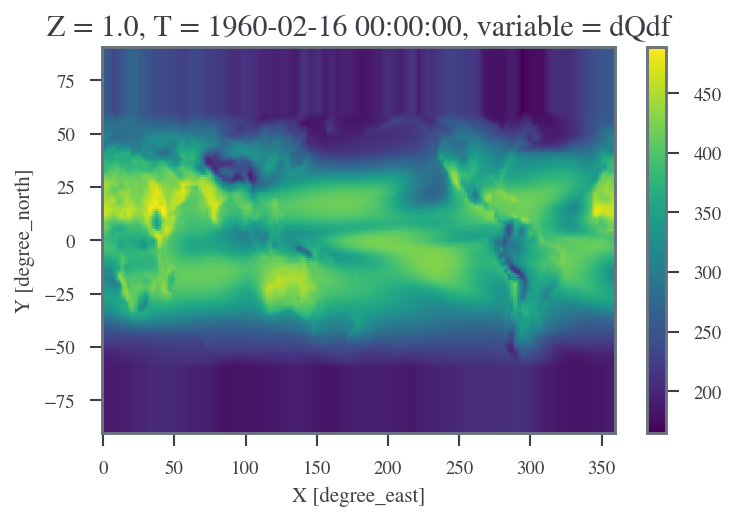

In [13]:
open_dataarray(setup.dq_df(it=0)).isel(T=1).plot()

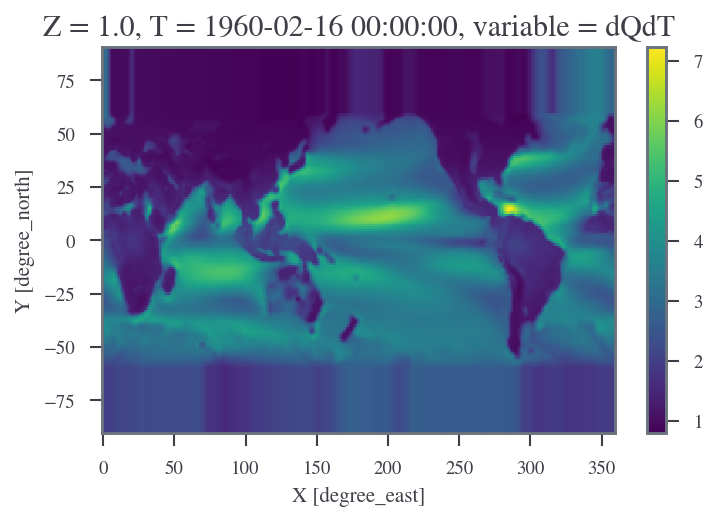

In [14]:
open_dataarray(setup.dq_dt(it=0)).isel(T=1).plot()

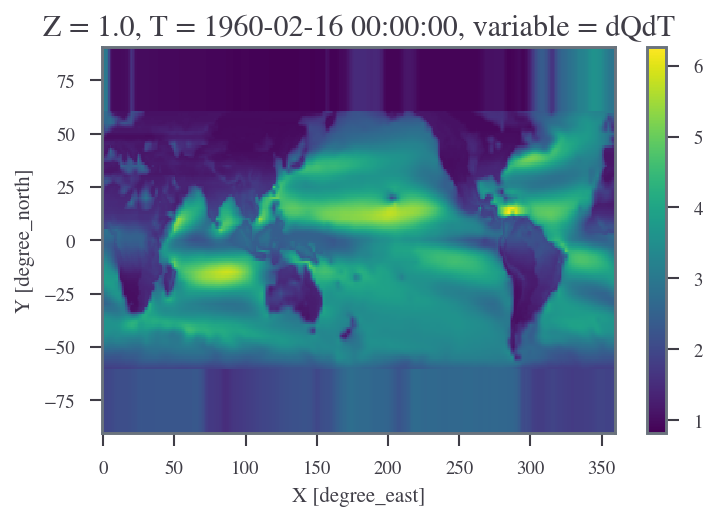

In [15]:
open_dataarray(setup.dq_dt(it=1)).isel(T=1).plot()

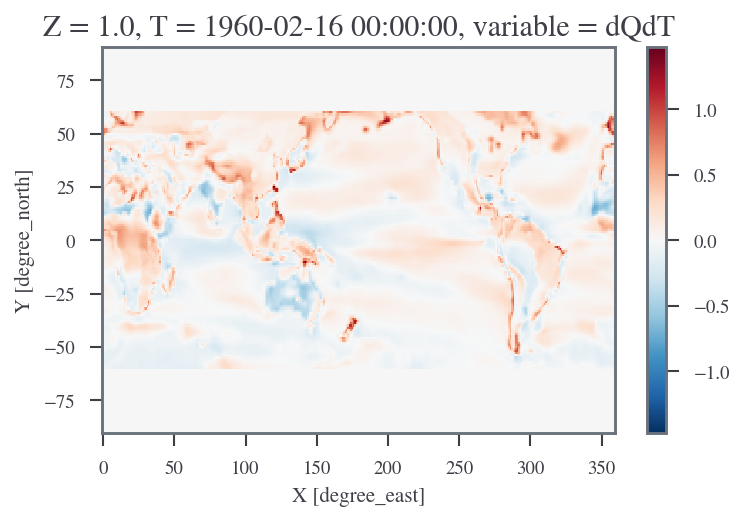

In [16]:
(
    (
        open_dataarray(setup.dq_dt(it=1)).isel(T=1)
        - open_dataarray(setup.dq_dt(it=0)).isel(T=1)
    )
    / open_dataarray(setup.dq_dt(it=0)).isel(T=1)
).plot()

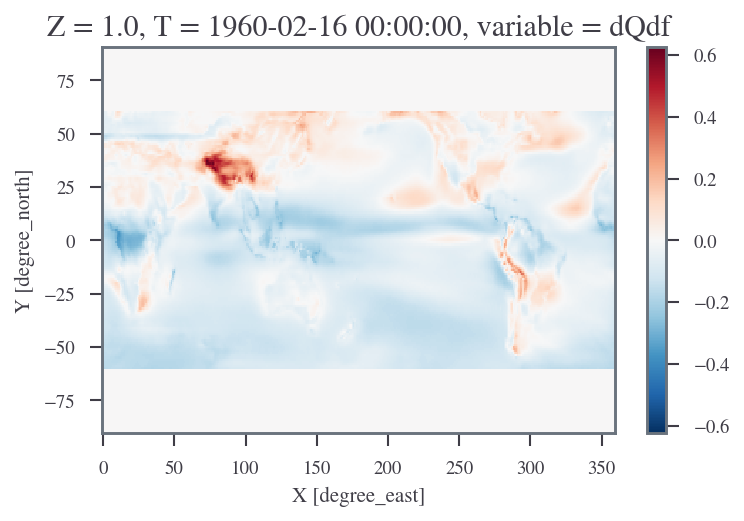

In [17]:
(
    (
        open_dataarray(setup.dq_df(it=1)).isel(T=1)
        - open_dataarray(setup.dq_df(it=0)).isel(T=1)
    )
    / open_dataarray(setup.dq_df(it=0)).isel(T=1)
).plot()

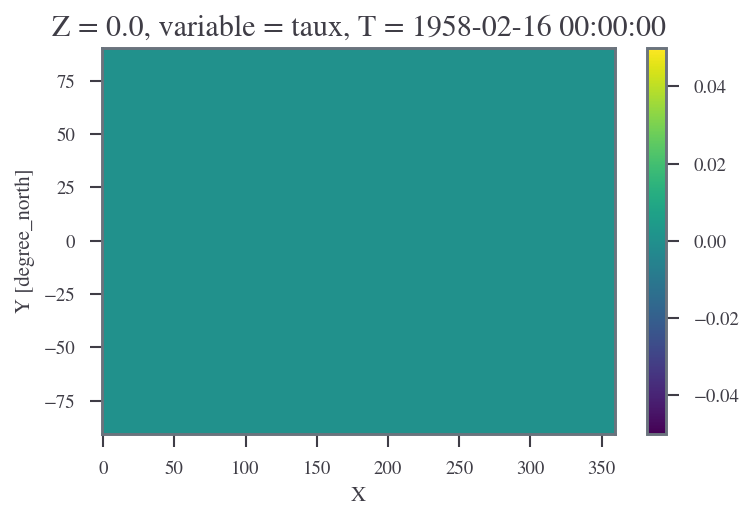

In [18]:
(
    (
        open_dataarray(setup.tau_x(it=1)).isel(T=1)
        - open_dataarray(setup.tau_x(it=0)).isel(T=1)
    )
    / open_dataarray(setup.tau_x(it=0)).isel(T=1)
).plot()

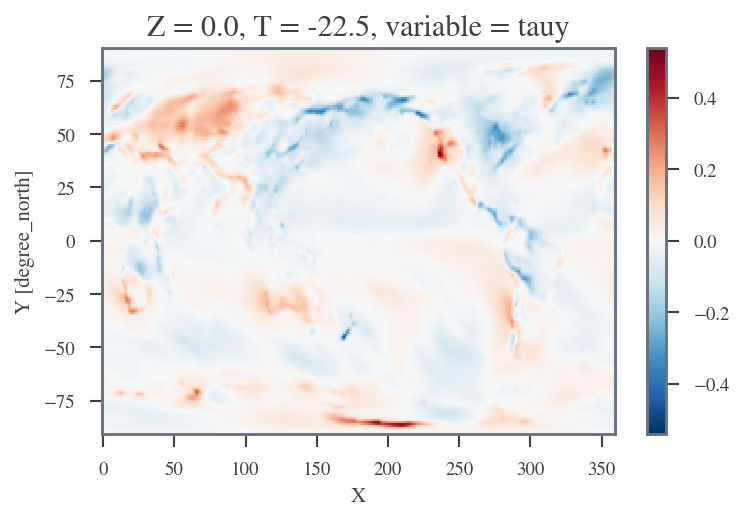

In [19]:
open_dataarray(setup.tau_y(it=1)).isel(T=1).plot()

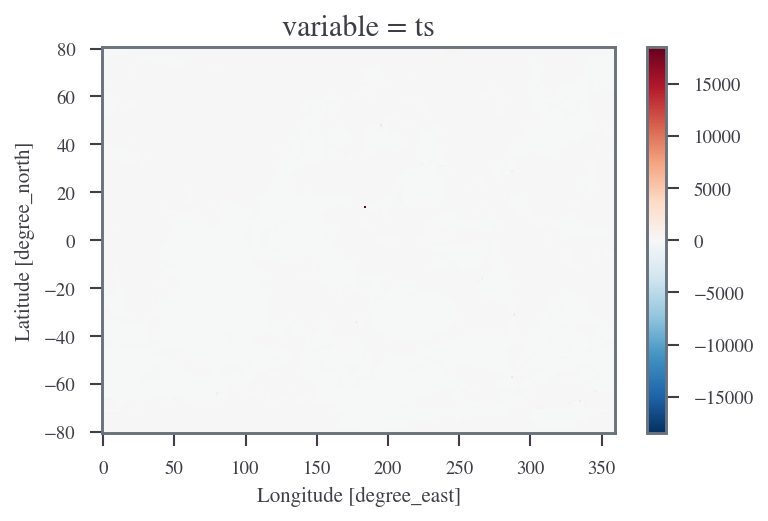

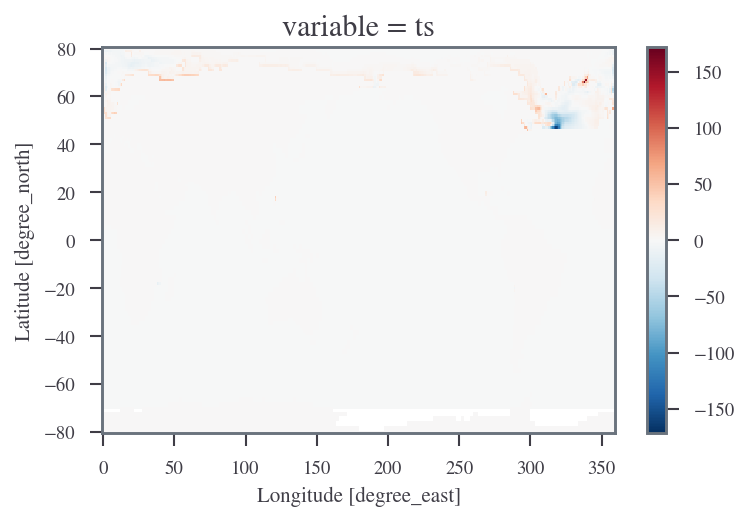

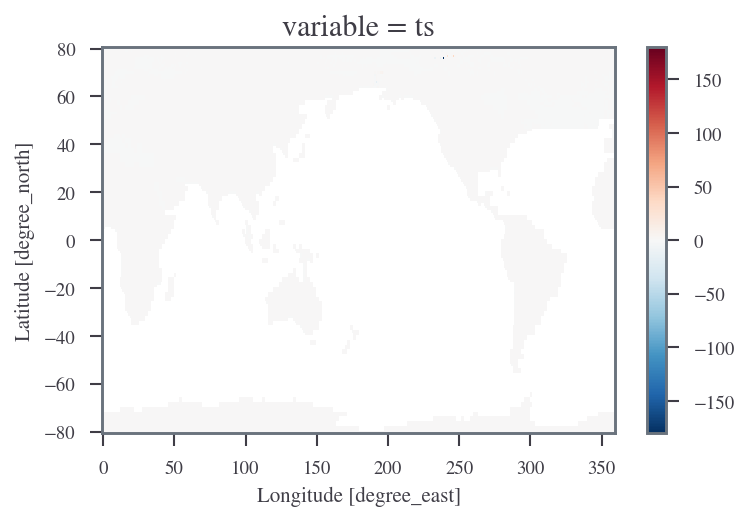

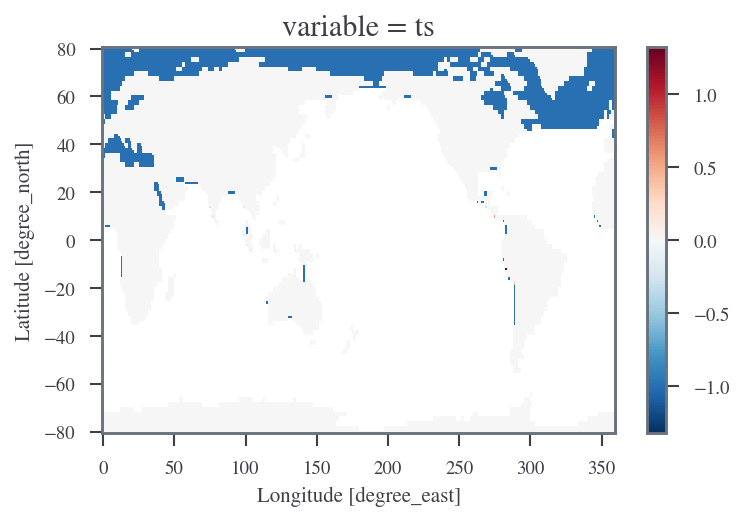

In [20]:
for i in range(1, 5):
    (
        (
            open_dataarray(setup.ts_trend(it=i))
            - open_dataarray(setup.ts_trend(it=i-1))
        )
        / open_dataarray(setup.ts_trend(it=i-1))
    ).plot()
    plt.show()

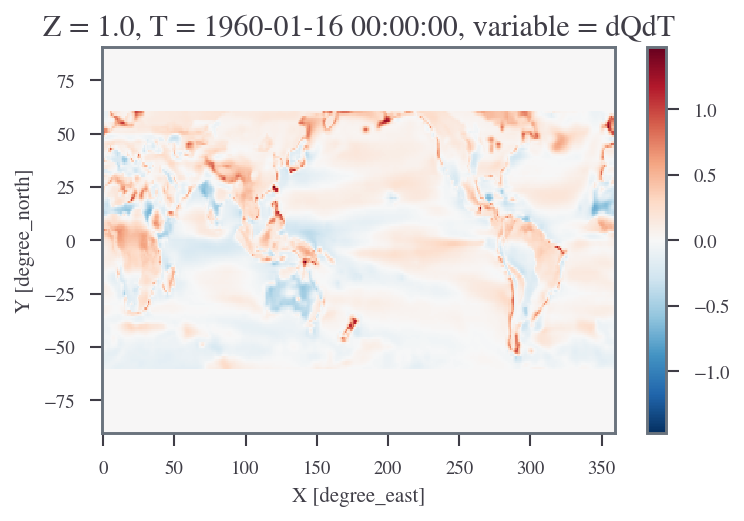

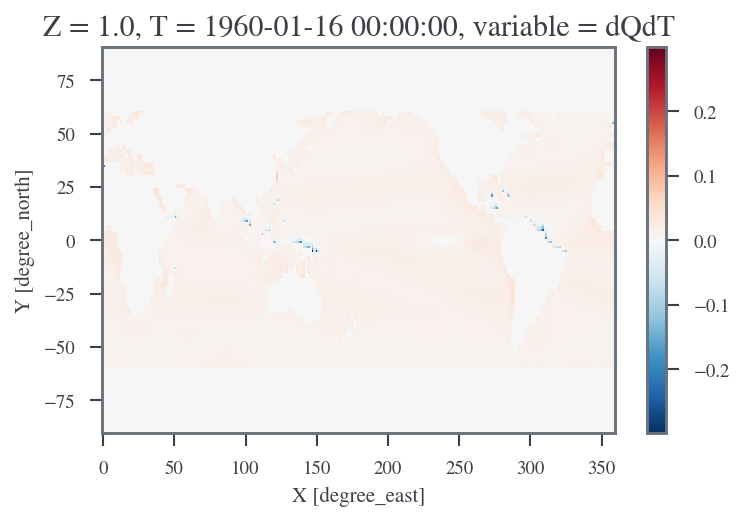

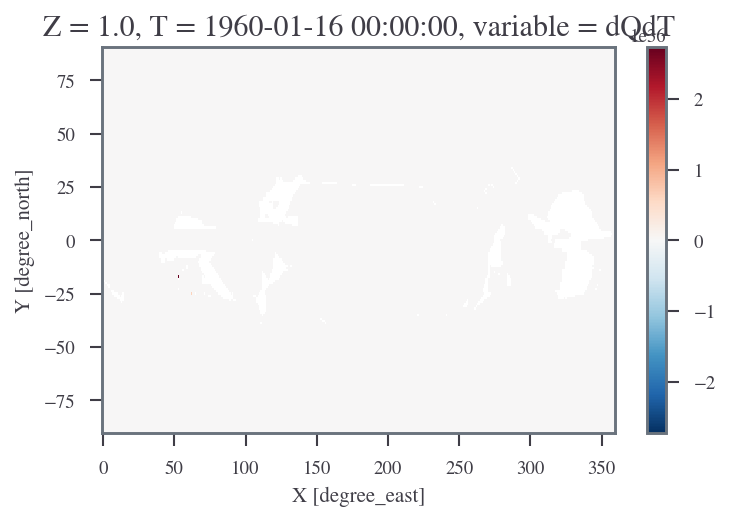

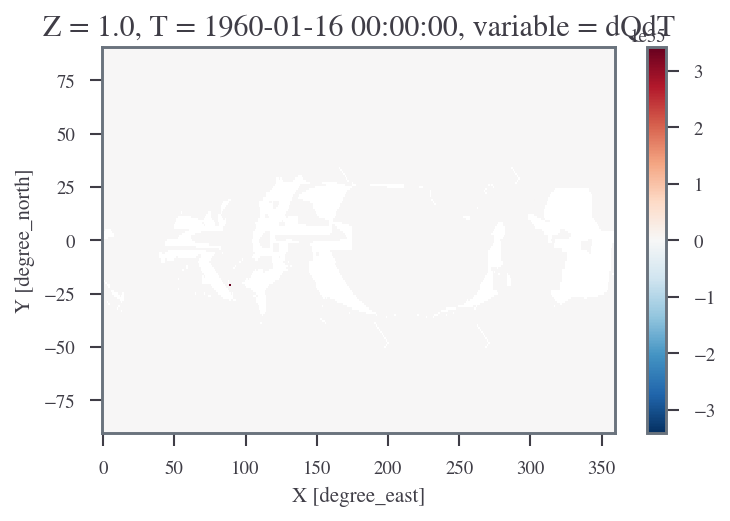

In [21]:
for i in range(1, 5):
    (
        (
            open_dataarray(setup.dq_dt(it=i)).isel(T=0)
            - open_dataarray(setup.dq_dt(it=i-1)).isel(T=0)
        )
        / open_dataarray(setup.dq_dt(it=i-1)).isel(T=0)
    ).plot()
    plt.show()

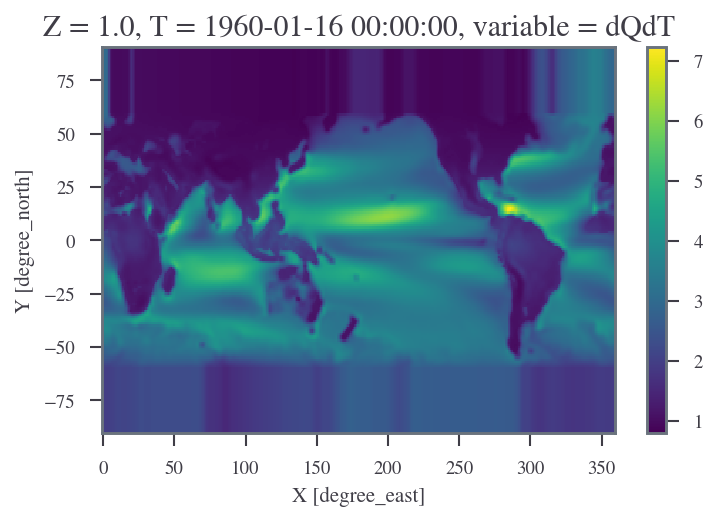

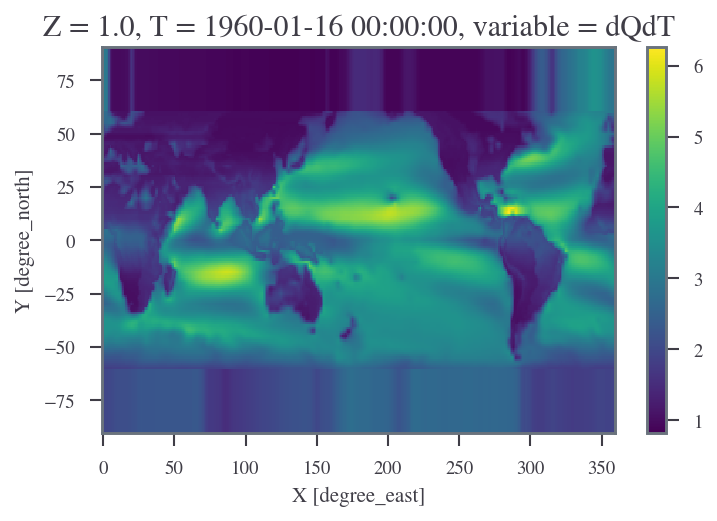

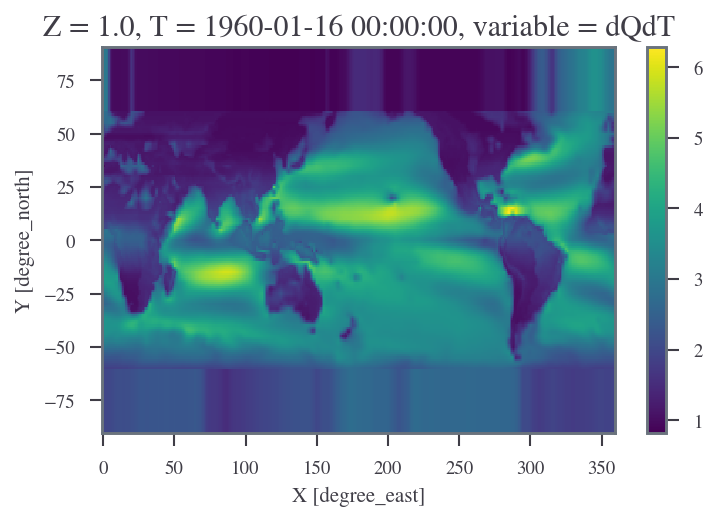

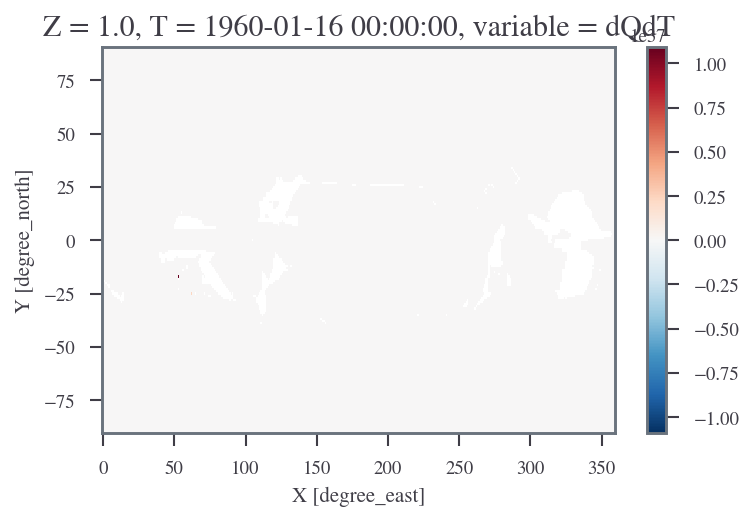

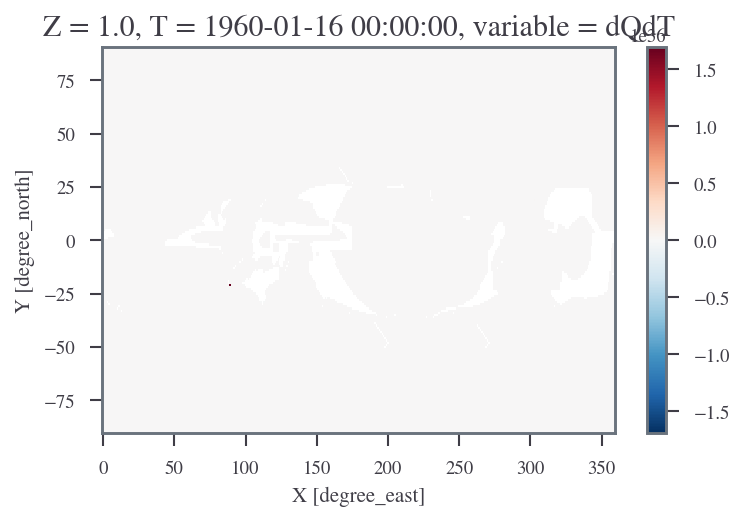

In [22]:
for i in range(0, 5):
    open_dataarray(setup.dq_dt(it=i)).isel(T=0).plot()
    plt.show()

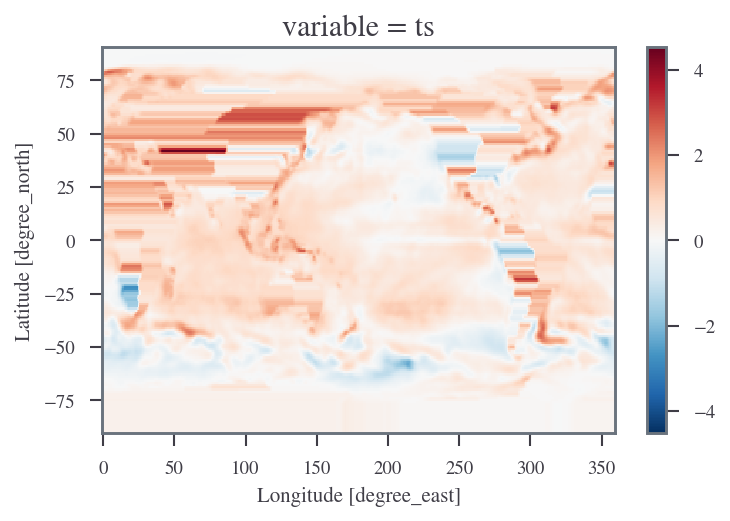

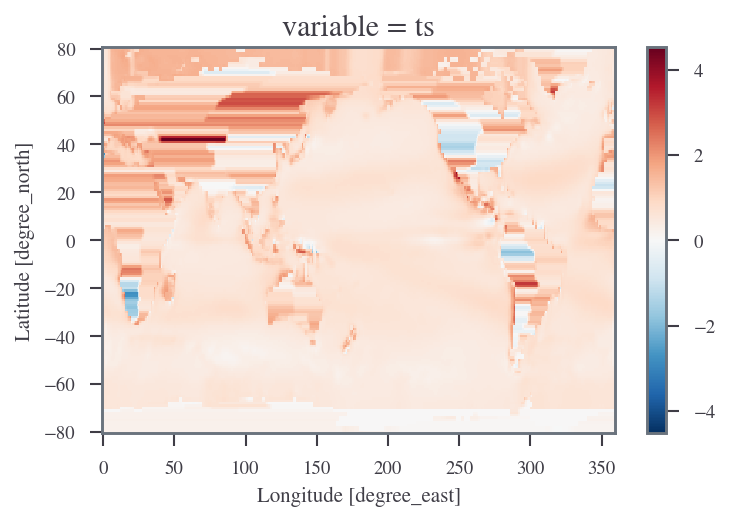

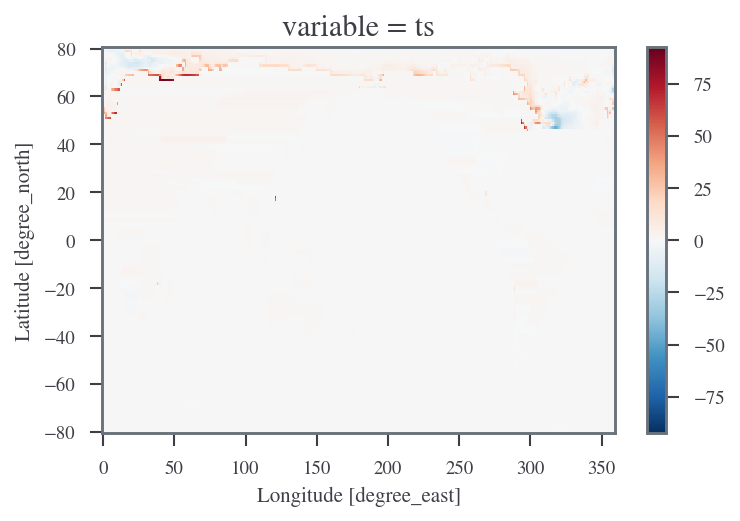

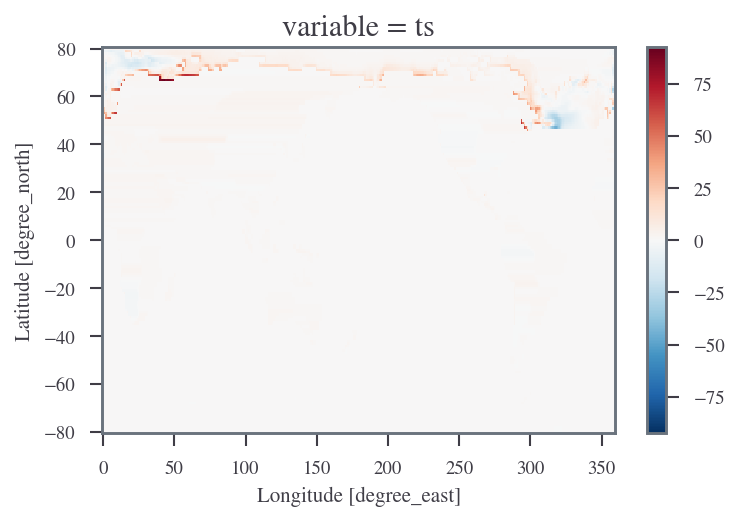

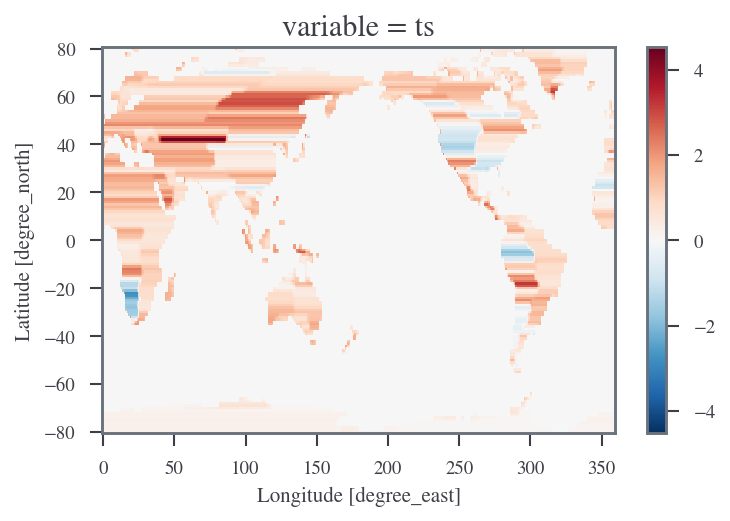

In [23]:
for i in range(0, 5):
    open_dataarray(setup.ts_trend(it=i)).plot()
    plt.show()